In [65]:
# Imports & Packages
import numpy as np
import pandas as pd
import os
import re

import time, random
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

current_dir = os.getcwd()

file_path = os.path.join(current_dir, "data/Fund_managers_and_Monte_Carlo/vc_funds_fund_manager_groups.xlsx")
data = pd.read_excel(file_path, index_col = 0)
data.head()

,FUND ID,NAME,Vintage,MOIC,DATE REPORTED,FUND MANAGER,Emerging FM,Developing FM,Established FM
0,7776,AMWIN Innovation Fund,1998,5.47,2014-12-31,CHAMP Ventures,Yes,No,No
1,1241,Matrix Partners V,1998,19.86,2023-09-30,Matrix Partners,No,No,Yes
2,1301,SOFTBANK Technology Ventures IV,1998,1.25,1998-12-31,Softbank Capital,No,Yes,No
3,2917,Crescendo I,1995,8.28,2023-09-30,Crescendo Ventures,Yes,No,No
4,3944,Clearstone Venture Partners I-A,1998,14.70,2012-06-30,Clearstone Venture Partners,No,Yes,No


# Monte Carlo Simulations on funds vintaged between the years 2000 and 2019

In [66]:
post_2000_data = data[data['Vintage'] >= 2000].copy()

emerging_funds = post_2000_data[post_2000_data['Emerging FM'] == 'Yes']
established_funds = post_2000_data[post_2000_data['Established FM'] == 'Yes']

post_2000_data_top_quartile = post_2000_data[post_2000_data['MOIC'] > 2.15].copy()

emerging_funds_top_quartile = post_2000_data_top_quartile[post_2000_data_top_quartile['Emerging FM'] == 'Yes']
established_funds_top_quartile = post_2000_data_top_quartile[post_2000_data_top_quartile['Established FM'] == 'Yes']

print(len(emerging_funds_top_quartile))
print(len(established_funds_top_quartile))
established_funds_top_quartile['Vintage'].value_counts()

270
139


Vintage
2016    15
2015    13
2007    12
2014    11
2011    10
2017    10
2012    10
2018     8
2019     7
2013     7
2008     7
2006     6
2001     5
2009     5
2010     4
2003     3
2005     2
2004     2
2002     1
2000     1
Name: count, dtype: int64

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:33<00:00, 295.90portfolio/s]


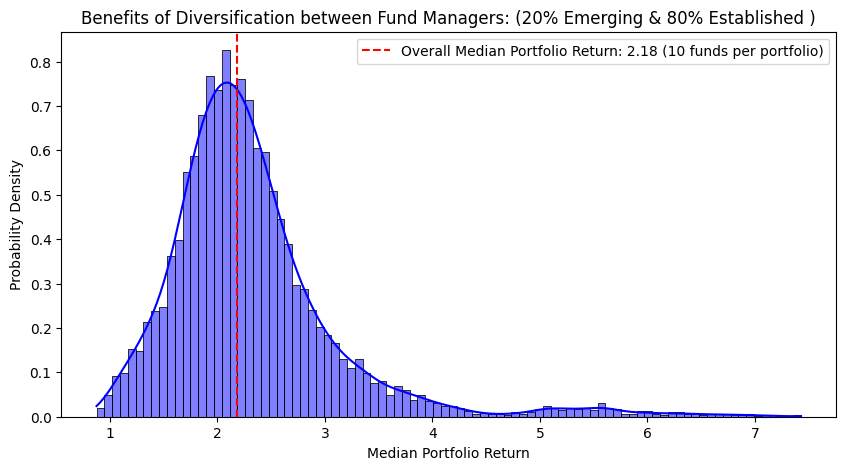

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:32<00:00, 310.90portfolio/s]


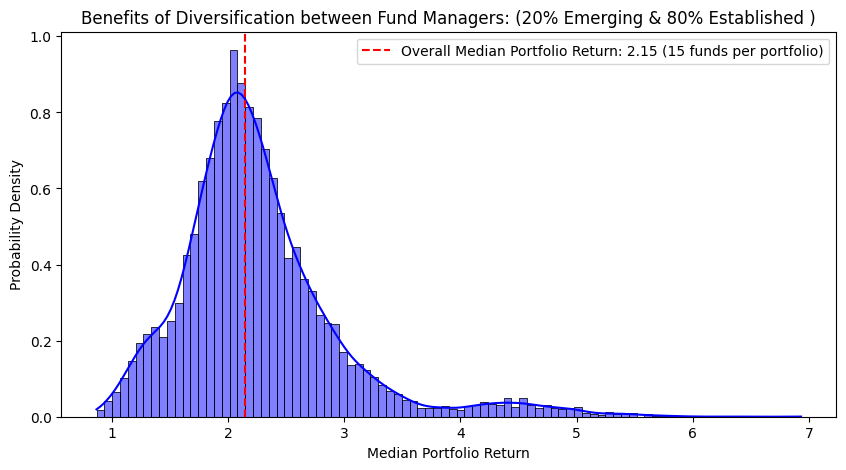

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:32<00:00, 305.62portfolio/s]


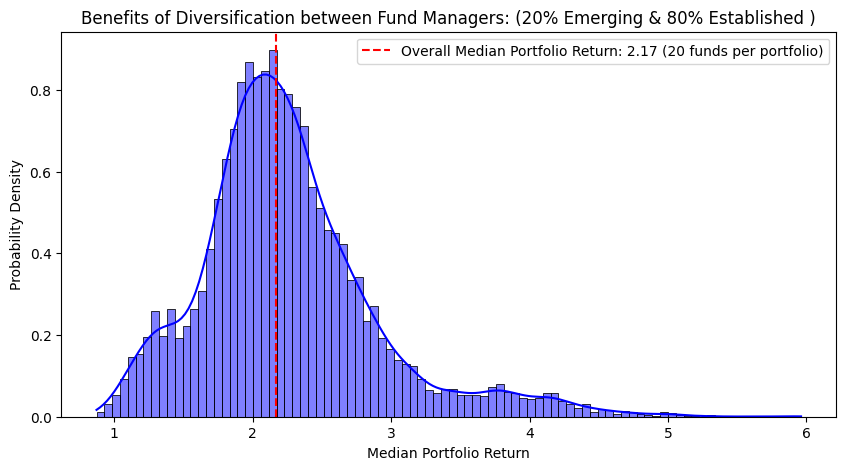

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:32<00:00, 305.77portfolio/s]


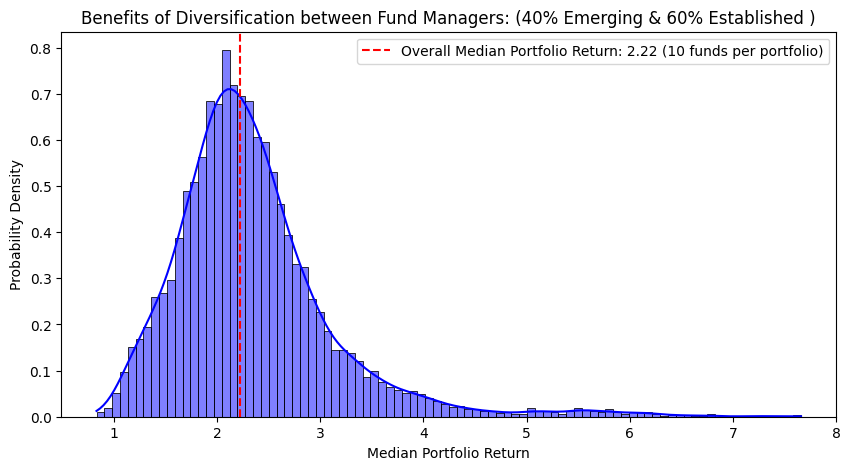

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:33<00:00, 296.80portfolio/s]


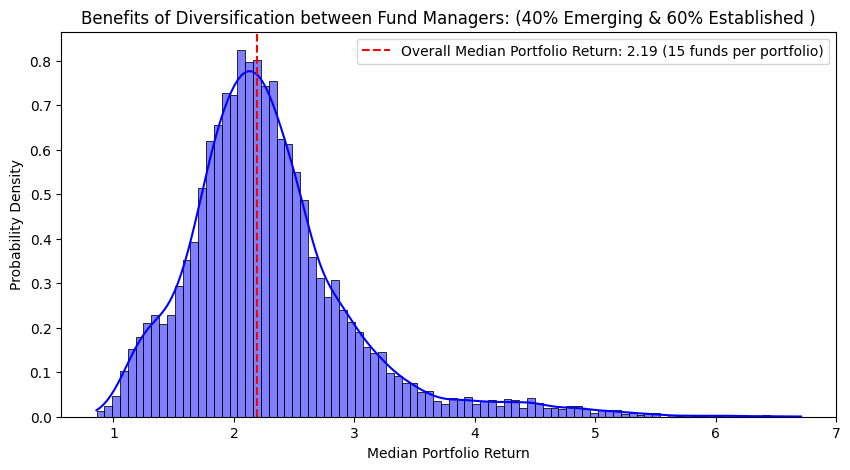

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:35<00:00, 280.50portfolio/s]


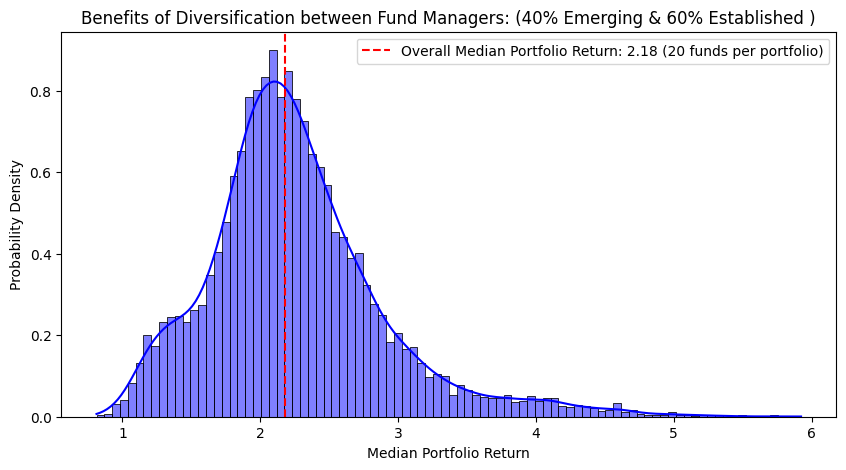

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:35<00:00, 283.15portfolio/s]


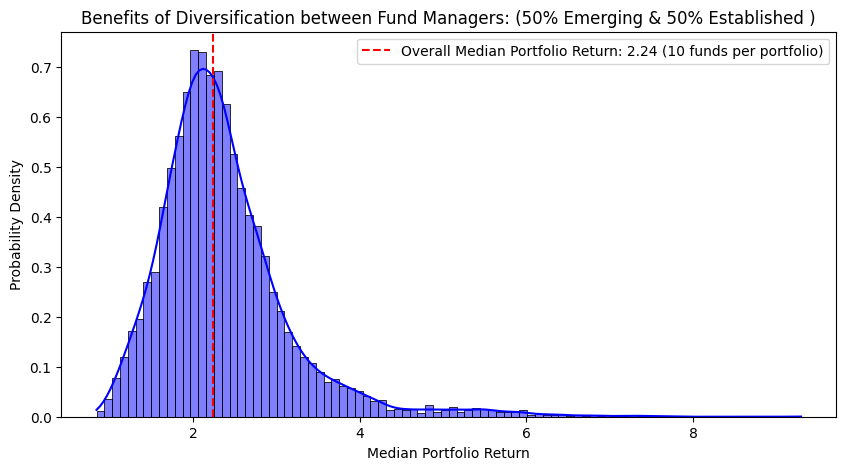

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:33<00:00, 296.18portfolio/s]


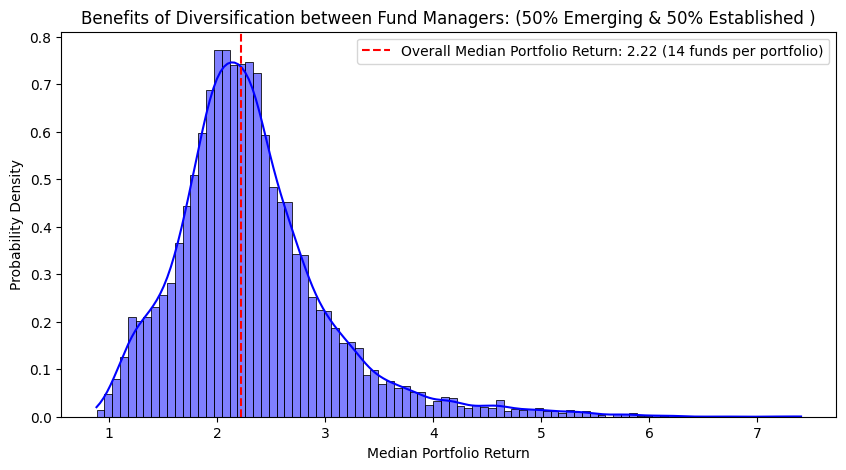

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:32<00:00, 303.30portfolio/s]


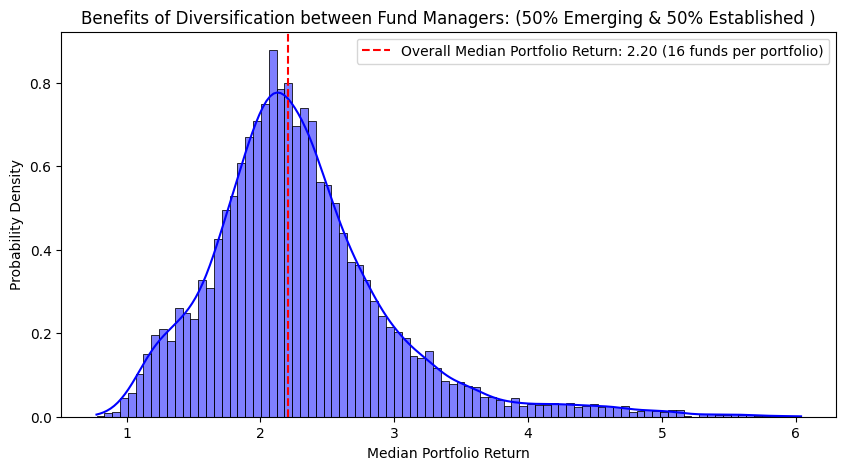

Simulating Portfolios...: 100%|██████████████████████████████████████████| 10000/10000 [00:35<00:00, 281.89portfolio/s]


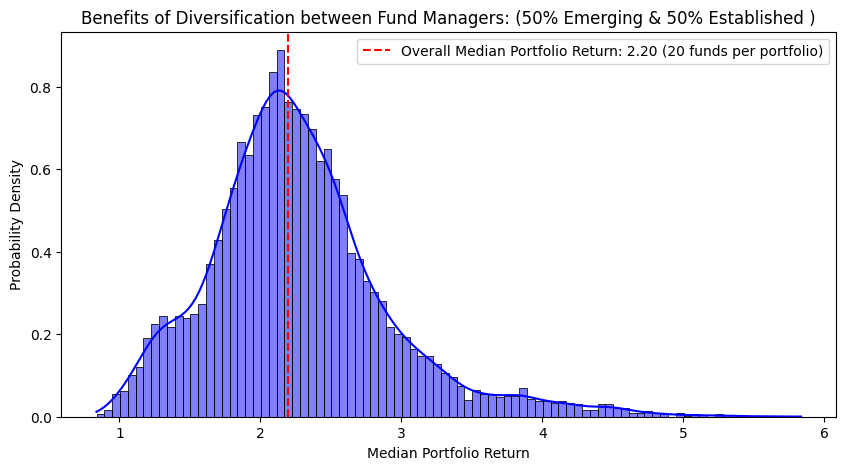

,FUND ID,NAME,Vintage,MOIC,DATE REPORTED,FUND MANAGER,FUND NUMBER (SERIES),FUND NUMBER (OVERALL),Emerging FM,Developing FM,Established FM
982,48043,ATX Seed Ventures I,2014,2.66,2023-03-31,ATX Venture Partners,1,1,Yes,No,No
1282,39268,Vox Impact Investing I FIP,2012,1.60,2020-06-30,Vox Capital,1,1,Yes,No,No
524,58807,Alpha JWC Ventures I,2016,3.70,2022-12-31,Alpha JWC Ventures,1,1,Yes,No,No
322,46889,Group 11 Fund II,2014,9.03,2023-06-30,Group 11,2,2,Yes,No,No
1144,64572,FTI Fund II,2015,1.76,2023-06-30,Fast Track Initiative,2,2,Yes,No,No
809,50008,Album VC I,2014,1.30,2016-03-31,Album VC,1,1,Yes,No,No
1951,66580,RUSNANO Sistema,2016,1.00,2019-12-31,RUSNANO Management Company,1,2,Yes,No,No
525,65727,PROOF Fund,2016,2.24,2023-06-30,PROOF.VC,1,1,Yes,No,No
449,69903,3one4 Capital Fund - Scheme I,2016,4.46,2023-06-30,3one4Capital Advisors,1,1,Yes,No,No
333,62272,HealthQuad Fund I,2016,2.13,2021-03-31,HealthQuad,1,1,Yes,No,No


In [51]:
def simulate_portfolio_median_returns(data, n_assets, n_emerging_funds, n_established_funds, manager_type, returns_column = 'MOIC', vintage_column = 'Vintage', n_portfolios = 10000):  
    """
    Simulate median returns of portfolios based on specified conditions.

    Parameters:
    - data: DataFrame containing the dataset.
    - returns_column: Column containing the returns data (MOIC).
    - vintage_column: Column containing the vintage information.
    - manager_type: A string indicating the type of fund manager (e.g., 'emerging', 'developing', 'established').
    - n_assets: Number of funds in each portfolio.
    - n_portfolios: Number of portfolios to simulate.
    - max_iterations: Maximum iterations for sampling portfolios.

    Returns:
    - portfolio_median_performances: List of median returns for each simulated portfolio.
    """
    
    portfolio_median_performances = []
    last_three_portfolios = []

    for _ in tqdm(range(n_portfolios), desc = "Simulating Portfolios...", unit = "portfolio"):
        selected_emerging = emerging_funds_top_quartile.sample(n = 1, replace = False)

        emerging_vintage_min = max(2000, selected_emerging['Vintage'].min() - 2) # retrieving the min vintage that can be included in the portfolio; We take the max between 2000 and the min vintage - 1. This ensures the min vintage doesn't go below the year 2000. If the calculated min vintage is 2000 or greater, it remains unchanged.
        emerging_vintage_max = selected_emerging['Vintage'].max() + 2 # retrieving the max vintage that can be included in the portfolio

        # Adding additional funds managed by emerging fund managers
        additional_emerging = emerging_funds[
            (emerging_funds['Vintage'] >= emerging_vintage_min) &
            (emerging_funds['Vintage'] <= emerging_vintage_max)
        ].sample(n = n_emerging_funds, replace = False)

        # Adding additional funds managed by established fund managers
        selected_established = established_funds[
            (established_funds['Vintage'] >= emerging_vintage_min) &
            (established_funds['Vintage'] <= emerging_vintage_max)
        ].sample(n = n_established_funds, replace = False)

        # Creating the portfolio
        portfolio_composition = pd.concat([selected_emerging, additional_emerging, selected_established])
    
        returns = portfolio_composition.loc[:, 'MOIC']
        selected_assets = np.random.choice(returns.index.dropna(), n_assets, replace = False)
        weights = np.ones(len(selected_assets)) / len(selected_assets)
    
        try:
            portfolio_median_return = np.dot(weights.T, returns[selected_assets])
            portfolio_median_performances.append(portfolio_median_return)
        except ValueError as e:
            #print(f"Error: {e}. Skipping this portfolio.")
            continue
    
    overall_median_moic_across_1000_portfolios = np.nanmedian(portfolio_median_performances)

    plt.figure(figsize = (10, 5))
    sns.histplot(portfolio_median_performances, kde = True, bins = 90, color = 'blue', stat = 'density', common_norm = False)
    plt.axvline(
        x = overall_median_moic_across_1000_portfolios,
        color = 'red',
        linestyle = '--',
        label = f'Overall Median Portfolio Return: {overall_median_moic_across_1000_portfolios:.2f} ({n_assets} funds per portfolio)'
    )
    plt.title(f'Benefits of Diversification between Fund Managers: ({manager_type} )')
    plt.xlabel('Median Portfolio Return')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    return portfolio_composition

##################################################### 20% Emerging & 80% Established #####################################################

plot_title = '20% Emerging & 80% Established'

# Simulating Portfolio Returns: 10 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 10, 1, 8, plot_title)

# Simulating Portfolio Returns: 15 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 15, 2, 12, plot_title)

# Simulating Portfolio Returns: 20 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 20, 4, 15, plot_title)

##################################################### 40% Emerging & 60% Established #####################################################

plot_title = '40% Emerging & 60% Established'
# Simulating Portfolio Returns: 10 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 10, 3, 6, plot_title)

# Simulating Portfolio Returns: 15 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 15, 5, 9, plot_title)

# Simulating Portfolio Returns: 20 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 20, 7, 12, plot_title)

##################################################### 50% Emerging & 50% Established #####################################################

plot_title = '50% Emerging & 50% Established'
# Simulating Portfolio Returns: 10 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 10, 4, 5, plot_title)

# Simulating Portfolio Returns: 14 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 14, 6, 7, plot_title)

# Simulating Portfolio Returns: 16 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 16, 7, 8, plot_title)

# Simulating Portfolio Returns: 20 funds per portfolio
simulate_portfolio_median_returns(post_2000_data, 20, 9, 10, plot_title)